<a href="https://colab.research.google.com/github/Camila-RojasUIS/Python---T-picos/blob/main/BONO_PRIMER_EXAMEN_PARTE_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRODUCCIÓN**

Este trabajo se centra en la aplicación de la estadística descriptiva para el análisis de variables cualitativas. A través del estudio de la base de datos "nac2020.csv", que recopila información sobre nacimientos en Colombia, se explorará el comportamiento de variables como el tiempo de gestación (T_GES) y la talla de nacimiento (TALLA_NAC). Utilizando técnicas de visualización, análisis de proporciones y tablas de contingencia, se buscará comprender la distribución y la posible asociación entre estas variables, ofreciendo interpretaciones detalladas respaldadas por herramientas estadísticas.

**SEGUNDA PARTE**

# Estadística descriptiva para variables cualitativas



*   Gráficos para datos de una variable cualitativa.
*   Proporciones asociadas a los valores de una variable cualitativa.



In [ ]:
from google.colab import files #para cargar archivos de google colab
uploaded = files.upload()

Saving nac2020.csv to nac2020.csv


In [ ]:
import pandas as pd
import io
io_csv = io.BytesIO(uploaded['nac2020.csv'])
tabla = pd.read_csv(io_csv, sep = ",", index_col=0, encoding='latin-1')
tabla.head(3)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,AREA_RES,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
44,560,3,2,NaN,2,9,9,2020,11,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5


In [ ]:
tabla1 = tabla[["T_GES", "TALLA_NAC"]]
tabla1.head(4)

,T_GES,TALLA_NAC
COD_DPTO,,
44,6,9
44,6,9
44,6,9
44,6,9


In [ ]:
df2 = tabla1[(tabla1.T_GES < 6) & (tabla1["TALLA_NAC"] != 9)]
df2.head(4)

,T_GES,TALLA_NAC
COD_DPTO,,
52,4,4
20,4,5
27,4,5
27,4,4


In [ ]:
df2.T_GES.head(2)
df2.T_GES = df2.T_GES.astype(str)
df2.T_GES.head(2)

<ipython-input-74-e608aef629bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.T_GES = df2.T_GES.astype(str)


COD_DPTO
52    4
20    4
Name: T_GES, dtype: object

In [ ]:
df2.loc[(df2.T_GES == "1"), "T_GES"] = "0-22"
df2.loc[(df2.T_GES == "2"), "T_GES"] = "22-27"
df2.loc[(df2.T_GES == "3"), "T_GES"] = "28-37"
df2.loc[(df2.T_GES == "4"), 'T_GES'] = "38-41"
df2.loc[(df2.T_GES == "5"), 'T_GES'] = "41-99"
df2.loc[(df2.T_GES == "6"), "T_GES"] = "IGN"
df2.loc[(df2.T_GES == "9"), 'T_GES'] = "NA"
df2.head(6)

,T_GES,TALLA_NAC
COD_DPTO,,
52,38-41,4
20,38-41,5
27,38-41,5
27,38-41,4
27,38-41,5
20,38-41,4


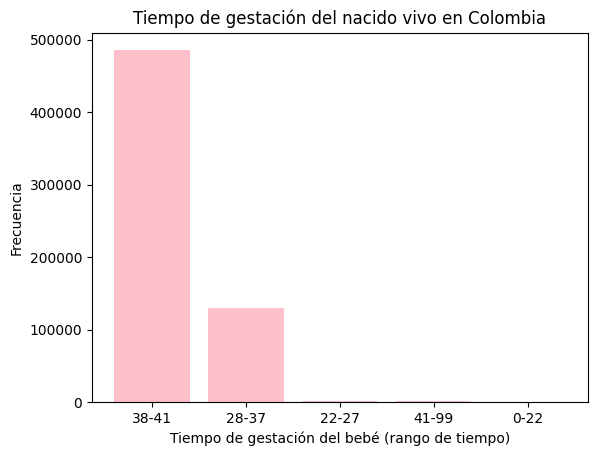

In [ ]:
import matplotlib.pyplot as plt
x_values = df2.T_GES.unique()
y_values = df2.T_GES.value_counts().tolist()
plt.bar(x_values, y_values, color = "pink")
plt.title('Tiempo de gestación del nacido vivo en Colombia')
ax = plt.subplot()  # Axis
ax.set_xlabel('Tiempo de gestación del bebé (rango de tiempo)')
ax.set_ylabel('Frecuencia')
plt.show()



El valor de 30 a 41 semanas es el rango de tiempo donde se tienen alrededor de 500000 recién nacidos en Colombia. En rango de tiempo de 28 a 37 años se tienen aproximadamente 140000 recién nacidos en Colombia. Los rangos de edades de 22 a 27 semanas, mayor que 41, y menor que 21 tienen menos de 100000 recién nacidos en Colombia.

In [ ]:
import numpy as np
sizes = np.array(y_values)
sizes

array([485433, 130485,   2236,   1163,     28])

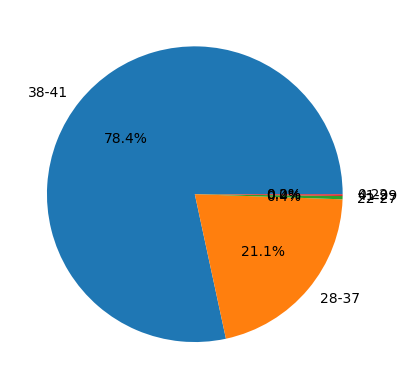

In [ ]:
plt.pie(y_values, labels = x_values, autopct='%1.1f%%')
plt.show()

In [ ]:
len(df2.T_GES)

619323

In [ ]:
porcentaje = [(x/len(df2.T_GES)*100) for x in y_values]
print(x_values)
print(porcentaje)

['38-41' '28-37' '22-27' '41-99' '0-22']
[78.37844819930734, 21.068225302537357, 0.3610265683908, 0.18777902461471394, 0.004520905149795348]


Aproximadamente el 78.37% de los recién nacidos en Colombia tienen entre 38 y 41 semanas de gestación, el 21.06% de los recién nacidos en Colombia tienen entre 28 y 37 semanas de gestación, el 0.36% de los recién nacidos en Colombia tienen entre 22 y 27 semanas de gestación, el 0.18% de los recién nacidos en Colombia tienen más de 41 semanas de gestación y el 0.004% de los recién nacidos en Colombia tienen menos de 22 semanas de gestación.

# **TABLAS DE CONTINGENCIA**


*   Representación gráfica de una tabla de contingencia.
*   Proporciones asociadas a una tabla de contingencia.



In [ ]:
df2.loc[(df2.T_GES == "1"), "T_GES"] = "0-22"
df2.loc[(df2.T_GES == "2"), "T_GES"] = "22-27"
df2.loc[(df2.T_GES == "3"), "T_GES"] = "28-37"
df2.loc[(df2.T_GES == "4"), 'T_GES'] = "38-41"
df2.loc[(df2.T_GES == "5"), 'T_GES'] = "41-99"
df2.loc[(df2.TALLA_NAC == 1), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == 2), "TALLA NAC"], df2.loc[(df2.TALLA_NAC == 3), "TALLA_NAC"] =  "0-19", "20-29", "30-39"
df2.loc[(df2.TALLA_NAC == 4), "TALLA_NAC"], df2.loc[(df2.TALLA_NAC == 5), "TALLA NAC"], df2.loc[(df2.TALLA_NAC == 6), "TALLA_NAC"] =  "40-49", "50-59", "60-Más"
df2.loc[(df2.T_GES == 9), 'T_GES'] = "NA"
df2.TALLA_NAC = df2.TALLA_NAC.astype(str)
df2.head(3)

<ipython-input-82-1de896a19e3a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.TALLA_NAC = df2.TALLA_NAC.astype(str)


,T_GES,TALLA_NAC,TALLA NAC
COD_DPTO,,,
52,38-41,40-49,NaN
20,38-41,5,50-59
27,38-41,5,50-59


In [ ]:
tabla_cont = pd.crosstab(df2.T_GES, df2["TALLA_NAC"])
tabla_cont

TALLA_NAC,0-19,2,30-39,40-49,5,60-Más
T_GES,,,,,,
0-22,0,22,6,0,0,0
22-27,2,260,1872,102,0,0
28-37,0,53,3619,89212,37593,8
38-41,0,76,198,162543,322515,101
41-99,0,0,0,256,902,5


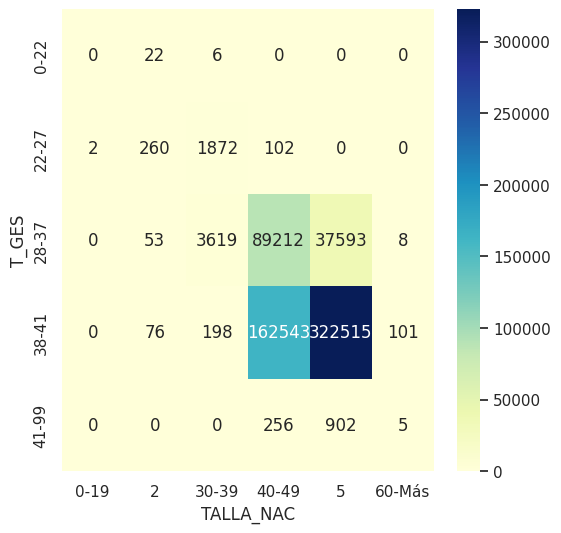

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(tabla_cont,  annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.show()


In [88]:
import scipy.stats as stats
res = stats.chi2_contingency(tabla_cont)
chi, valor_p, _, _ = res
print(f"El valor de la estadística Chi cuadrado es {chi} y el valor p es d {valor_p}")

El valor de la estadística Chi cuadrado es 305687.2032391818 y el valor p es d 0.0




*   Si valor p < 0.05 se rechaza la hipótesis nula
*   Si valor p > 0.05 no se rechaza la hipótesis nula

Como el valor p $0.0 < 0.05$ se rechaza la hipótesis nula, es decir, no se rechaza con una confianza del 95% que la talla y el tiempo de gestación de un recién nacido en Colombia estén asociadas.



In [89]:
import math
coeficiente_contingencia = math.sqrt(chi/(chi + len(df2.TALLA_NAC)))
coeficiente_phi = math.sqrt(chi/len(df2.TALLA_NAC))
coeficiente_v_cramer = math.sqrt(chi/(len(df2.TALLA_NAC)*min(4-1, 2-1)))
print(f"Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por {coeficiente_contingencia}, {coeficiente_phi} y {coeficiente_v_cramer}")


Los coeficientes de contingencia, Phi y V de Cramer están respectivamente dados por 0.5748575017974198, 0.7025420300976799 y 0.7025420300976799


De acuerdo con el artículo Landis, J. R., & Koch, G. G. (1977). The measurement of observer agreement for categorical data. biometrics, 159-174, el cual se puede consultar en el siguiente [link](https://www.jstor.org/stable/2529310), se tiene que la talla y el tiempo de gestación de un bebé en Colombia están sustancialmente asociados.

Interpretación general


*   Y depende ____ de X
*   X y Y son ______ homogénas
*   X y Y están ______ asociadas

Donde _____ = nula ($Chi, \phi, V ≈ 0$), ______ = insignificantemente ($0 < Chi, \phi, V < 0.2$), ______ = discretamente ($0.2 < Chi, \phi, V < 0.4$), ______ = moderadamente ($0.4 < Chi, \phi, V < 0.6$), ______ = sustancialmente ($0.6 < Chi, \phi, V < 0.8$) y ______ = fuertemente ($0.8 < Chi, \phi, V < 1$)






**CONCLUSIÓN**

En este análisis de los datos de nacimientos en Colombia, hemos observado que la mayoría de los recién nacidos tienen un tiempo de gestación entre 38 y 41 semanas, representando el 78.37% del total. La distribución de los nacimientos disminuye significativamente fuera de este rango, con solo el 0.18% naciendo después de 41 semanas y un ínfimo 0.004% antes de las 22 semanas. Además, se ha determinado que existe una asociación significativa entre la talla de nacimiento y el tiempo de gestación, lo cual refuerza la importancia de considerar ambos factores en el estudio de la salud neonatal. Este hallazgo se sostiene con un nivel de confianza del 95%, lo que indica una relación sustancial entre estas variables en la población de recién nacidos en Colombia.